# Autoencoder Developement Using MNIST

This was the first proof of concept with being able to not only develop a decent autoencoder, but also to be able to manipulate the latent vectors of the images. Although our project idea has changed, this was a large step in the right direction for this idea.

In [ ]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns

# Load and preprocess the MNIST dataset
(x_train, _), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255.0  # Normalize to [0, 1]
x_test = x_test.astype("float32") / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)  # Reshape to (28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")



x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


To visualize the embeddings learned by the autoencoder, we need to extract the latent representations (the output of the encoder) and then use dimensionality reduction techniques like t-SNE or PCA to map the high-dimensional latent space into a 2D space for visualization.

In [ ]:
# Define the dimensions of the latent space
latent_dim = 64

# Build the Encoder
input_img = Input(shape=(28, 28, 1))
x = Flatten()(input_img)
x = Dense(128, activation='relu')(x)
latent_vector = Dense(latent_dim, activation='relu')(x)

# Build the Decoder
x = Dense(128, activation='relu')(latent_vector)
x = Dense(28 * 28, activation='sigmoid')(x)
output_img = Reshape((28, 28, 1))(x)

# Define the Autoencoder Model
autoencoder = Model(input_img, output_img)

# Compile the Model
autoencoder.compile(optimizer='adam', loss='mse')

# Summarize the model
autoencoder.summary()




Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 784)                 │         101,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 28, 28, 1)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 218,192 (852.31 KB)

 Trainable params: 218,192 (852.31 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0700 - val_loss: 0.0192
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0173 - val_loss: 0.0127
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0123 - val_loss: 0.0106
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0103 - val_loss: 0.0089
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0090 - val_loss: 0.0081
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.0080 - val_loss: 0.0072
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0072 - val_loss: 0.0065
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0066 - val_loss: 0.0062
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0062 - val_loss: 0.0061
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0059 - val_loss: 0.0056


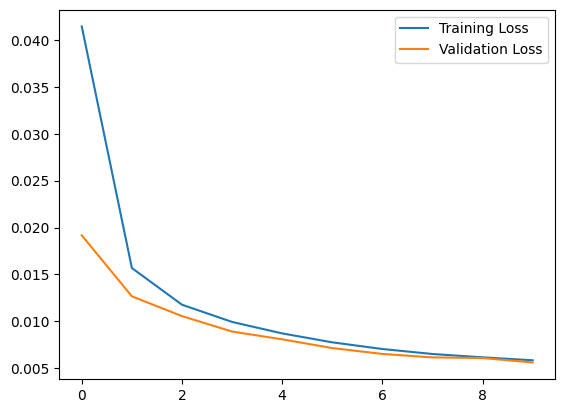

In [ ]:
# Train the Autoencoder
history = autoencoder.fit(
    x_train, x_train,
    epochs=10,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test, x_test)
)

# Plot Training and Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Training and validation loss are both quite low. This may suggest that the model is overfitting to the data.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


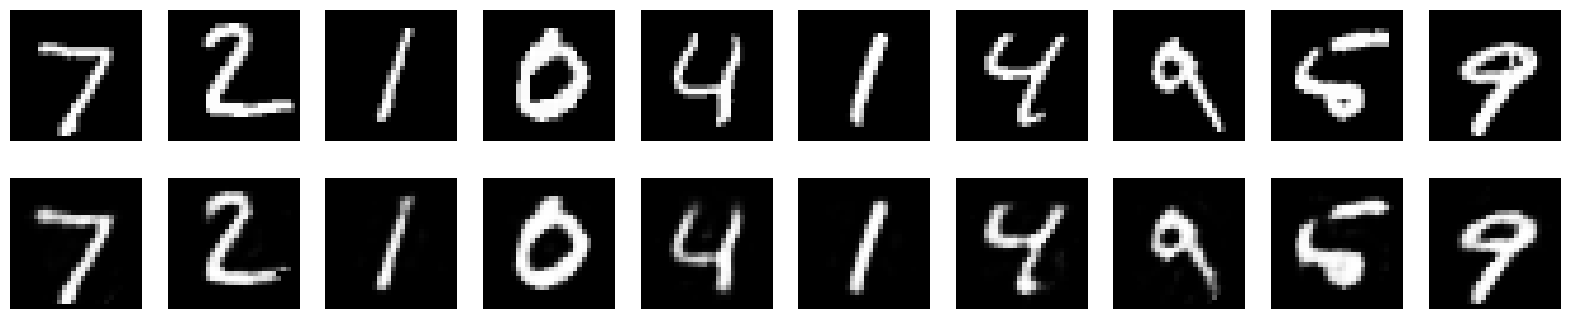

In [ ]:
# Visualize Results
def display_reconstructed_images(model, test_images, num_images=10):
    decoded_imgs = model.predict(test_images[:num_images])
    plt.figure(figsize=(20, 4))
    for i in range(num_images):
        # Original images
        ax = plt.subplot(2, num_images, i + 1)
        plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
        plt.axis("off")

        # Reconstructed images
        ax = plt.subplot(2, num_images, i + 1 + num_images)
        plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
        plt.axis("off")

display_reconstructed_images(autoencoder, x_test)


This plot shows that the autoencoder is working properly. The top row is the sample of images before being encoded, and the bottom row is the images after encoding and decoding. Notice that there is a slight difference in the images (The bottom images are slightly blurrier). This shows that there may have been some data loss in the process, but the overall shape of the image is fully intact.

In [ ]:
# Define the Encoder model
encoder = Model(inputs=autoencoder.input, outputs=latent_vector)

# Get latent representations for the test set
latent_representations = encoder.predict(x_test)
print(f"Latent representations shape: {latent_representations.shape}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Latent representations shape: (10000, 64)


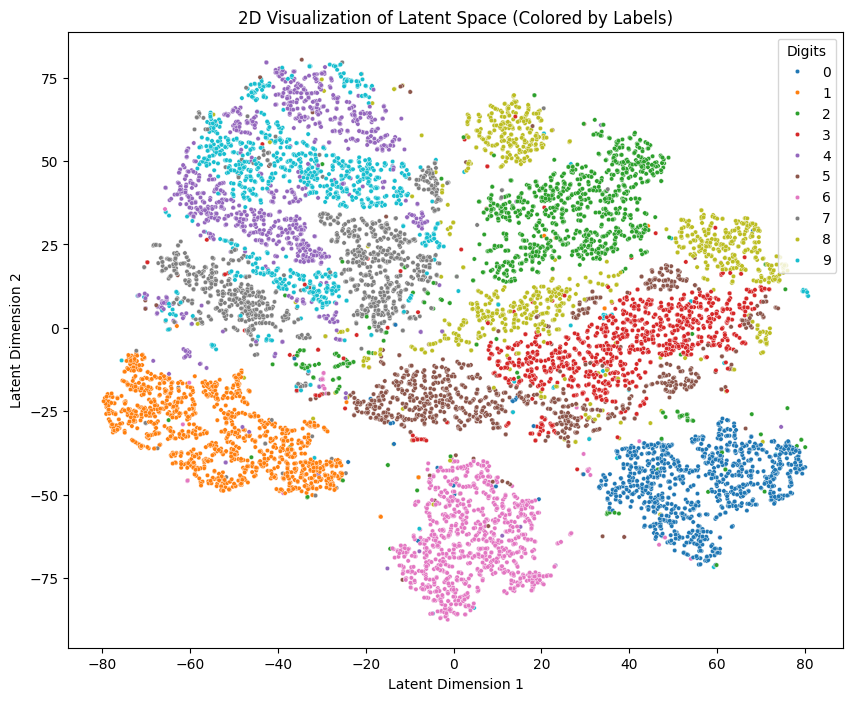

In [ ]:
# Use t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
latent_2d = tsne.fit_transform(latent_representations)

# Visualize the embeddings
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=latent_2d[:, 0], y=latent_2d[:, 1],
    hue=y_test, palette='tab10', s=10, legend='full'
)
plt.title("2D Visualization of Latent Space (Colored by Labels)")
plt.xlabel("Latent Dimension 1")
plt.ylabel("Latent Dimension 2")
plt.legend(loc="upper right", title="Digits")
plt.show()


In [ ]:
import numpy as np

# Function to evaluate the "oneness" of an image
def evaluate_oneness(test_images, test_labels, encoder_model, digit=1, num_samples=5):
    """
    Evaluates the characteristics of a specific digit (e.g., '1').

    Args:
        test_images: Preprocessed test images.
        test_labels: Ground-truth labels for the test set.
        encoder_model: The trained encoder model.
        digit: The digit to analyze (default is 1).
        num_samples: Number of samples to evaluate.

    Returns:
        Latent representations of the digit and their statistics.
    """
    # Select test images of the specified digit
    digit_indices = np.where(test_labels == digit)[0][:num_samples]
    digit_images = test_images[digit_indices]

    # Get latent representations
    latent_vectors = encoder_model.predict(digit_images)

    # Output the characteristics of the latent representations
    print(f"Analyzing {num_samples} samples of the digit '{digit}':")
    print(f"Latent vectors shape: {latent_vectors.shape}")
    print("Latent vector values (sample):")
    print(latent_vectors[:1])  # Display the first latent vector for inspection

    # Compute statistics (mean and variance)
    mean_latent = np.mean(latent_vectors, axis=0)
    variance_latent = np.var(latent_vectors, axis=0)
    print("\nLatent space characteristics:")
    print(f"Mean of latent vector: {mean_latent}")
    print(f"Variance of latent vector: {variance_latent}")

    return latent_vectors

# Evaluate the "oneness" of the number 1
latent_digit_1 = evaluate_oneness(x_test, y_test, encoder, digit=1, num_samples=5)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Analyzing 5 samples of the digit '1':
Latent vectors shape: (5, 64)
Latent vector values (sample):
[[3.8707044  6.8630238  2.672988   5.304825   3.104611   0.5952621
  5.213054   3.9129424  4.791342   1.6434133  3.5612154  2.8243473
  2.8909562  1.1011606  4.5957723  0.         5.5797524  4.7836084
  1.5514376  3.9979186  2.7013593  0.25814807 1.6940296  5.0431285
  2.4685285  7.0204134  0.6828425  3.6405108  5.21932    1.8236113
  3.8574705  2.793612   4.623149   1.6788632  5.477794   4.422065
  4.4232244  0.68146944 7.563711   3.23118    3.6889825  2.7961876
  6.6824183  1.5234566  0.25311917 0.         7.052297   1.9779032
  6.2389812  0.3213389  3.7533817  2.9471629  3.856708   2.5777626
  6.0618477  4.36714    3.1200051  1.7558562  1.2392963  1.4722391
  4.2471447  5.045509   3.3491137  3.7054458 ]]

Latent space characteristics:
Mean of latent vector: [6.5713286 4.815646  2.6035476 4.581111  5.6392975 2.9661603 5.0192523
 3.3755822 3.934647  

In [ ]:
# Debugging shapes
print(f"x_test shape: {x_test.shape}")
print(f"Latent representations shape: {latent_representations.shape}")
print(f"t-SNE output shape: {latent_2d.shape}")


x_test shape: (10000, 28, 28, 1)
Latent representations shape: (10000, 64)
t-SNE output shape: (10000, 2)


BELOW: Testing averaging all class vectors to have a 'perfect' vector for each class

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder (Functional)                 │ (None, 64)                  │         108,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder (Functional)                 │ (None, 28, 28, 1)           │         109,456 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 218,192 (852.31 KB)

 Trainable params: 218,192 (852.31 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.0691 - val_loss: 0.0188
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 0.0170 - val_loss: 0.0126
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0121 - val_loss: 0.0099
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.0099 - val_loss: 0.0086
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0088 - val_loss: 0.0078
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0080 - val_loss: 0.0073
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.0074 - val_loss: 0.0068
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0069 - val_loss: 0.0065
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0065 - val_loss: 0.0060
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.0062 - val_loss: 0.0059
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━

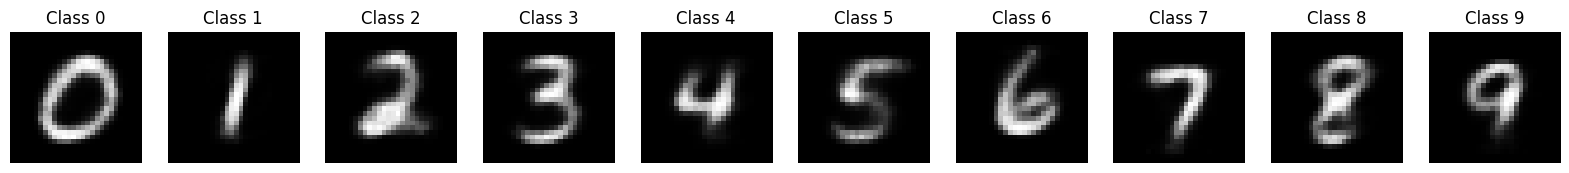

In [ ]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255.0  # Normalize to [0, 1]
x_test = x_test.astype("float32") / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)  # Reshape to (28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")

# Define the dimensions of the latent space
latent_dim = 64

# Build the Encoder
input_img = Input(shape=(28, 28, 1))
x = Flatten()(input_img)
x = Dense(128, activation='relu')(x)
encoded = Dense(latent_dim, activation='relu', name='encoder_output')(x)

# Build the Decoder
decoder_input = Input(shape=(latent_dim,))
x = Dense(128, activation='relu')(decoder_input)
x = Dense(28 * 28, activation='sigmoid')(x)
decoded = Reshape((28, 28, 1))(x)

# Create separate encoder and decoder models
encoder = Model(input_img, encoded, name='encoder')
decoder = Model(decoder_input, decoded, name='decoder')

# Create the full autoencoder model
encoded_imgs = encoder(input_img)
output_img = decoder(encoded_imgs)
autoencoder = Model(input_img, output_img)

# Compile the Model
autoencoder.compile(optimizer='adam', loss='mse')

# Summarize the model
autoencoder.summary()

# Function to get class averages
def get_class_averages(encoder, images, labels):
    # Get encoded vectors
    encoded_vectors = encoder.predict(images)

    # Initialize dictionary to store vectors by class
    class_vectors = {}

    # Group vectors by class
    for i in range(10):  # 10 digits in MNIST
        class_mask = labels == i
        class_vectors[i] = np.mean(encoded_vectors[class_mask], axis=0)

    return class_vectors


# Training
autoencoder.compile(optimizer='adam', loss='mse')
# Train the full autoencoder
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                validation_data=(x_test, x_test))
# Train encoder
#encoder.fit(x_train, x_train, epochs=10, batch_size=128, validation_data=(x_test, x_test))

# Get class-averaged vectors
class_averages = get_class_averages(encoder, x_train, y_train)

# Generate reconstructions using class averages
reconstructions = {}
for digit, avg_vector in class_averages.items():
    # Reshape to match decoder input
    avg_vector = avg_vector.reshape(1, latent_dim)
    # Decode the average vector
    reconstructions[digit] = decoder.predict(avg_vector)

# Visualize results
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(reconstructions[i].reshape(28, 28), cmap='gray')
    plt.title(f'Class {i}')
    plt.axis('off')
plt.show()



This plot is the result of taking all of the vectors in each class, and finding the average. Then, the result is 10 vectors, each representing their respective number class. This will be very useful for the eyes, as we want to average the images to get a general representation of each iris color class.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


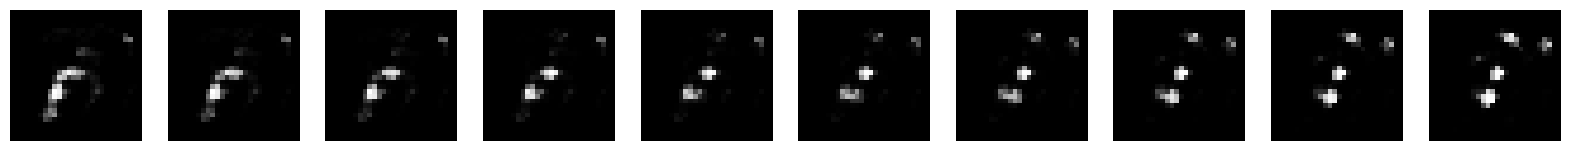

In [ ]:
# Interpolation function between two latent vectors
def interpolate_latent_space(start_latent, end_latent, num_steps=10):
    # Interpolate between two latent vectors
    return np.linspace(start_latent, end_latent, num_steps)

# Select two random latent vectors from the test set
latent_start = latent_representations[0]  # Example: latent representation of the first test image
latent_end = latent_representations[10]  # Example: latent representation of the 11th test image

# Perform interpolation
interpolated_latents = interpolate_latent_space(latent_start, latent_end, num_steps=10)

# Generate reconstructed images from interpolated latent vectors
interpolated_images = decoder.predict(interpolated_latents)

# Plot the interpolated images
plt.figure(figsize=(20, 4))
for i, img in enumerate(interpolated_images):
    plt.subplot(1, 10, i+1)
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.axis("off")
plt.show()


x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


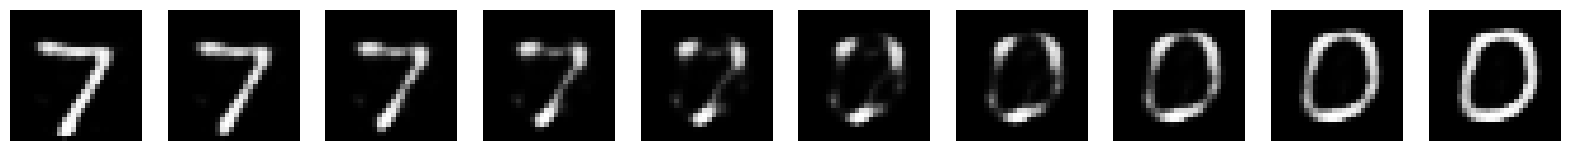

In [ ]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
import numpy as np # Importing numpy for array operations

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255.0  # Normalize to [0, 1]
x_test = x_test.astype("float32") / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)  # Reshape to (28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")

# Define the dimensions of the latent space
latent_dim = 64

# ... (rest of your autoencoder code) ...

# Get latent representations for the test set using the encoder
latent_representations = encoder.predict(x_test)

# Interpolation function between two latent vectors
def interpolate_latent_space(start_latent, end_latent, num_steps=10):
    # Interpolate between two latent vectors
    return np.linspace(start_latent, end_latent, num_steps)

# Select two random latent vectors from the test set
latent_start = latent_representations[0]  # Example: latent representation of the first test image
latent_end = latent_representations[10]  # Example: latent representation of the 11th test image

# Perform interpolation
interpolated_latents = interpolate_latent_space(latent_start, latent_end, num_steps=10)

# Generate reconstructed images from interpolated latent vectors
interpolated_images = decoder.predict(interpolated_latents)

# Plot the interpolated images
plt.figure(figsize=(20, 4))
for i, img in enumerate(interpolated_images):
    plt.subplot(1, 10, i+1)
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.axis("off")
plt.show()

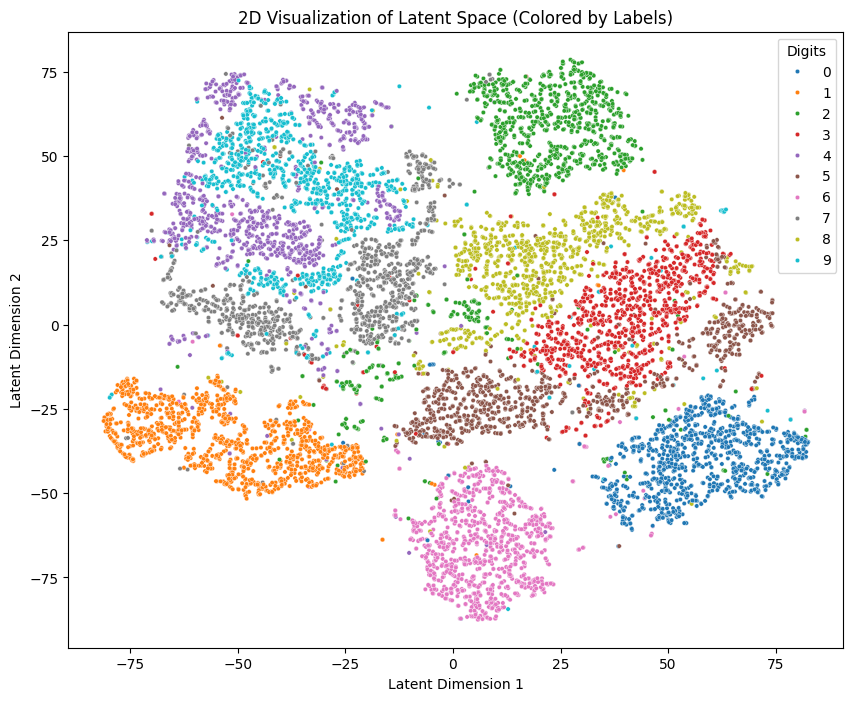

In [ ]:
# Use t-SNE to visualize the latent space of MNIST
latent_2d = TSNE(n_components=2, random_state=42).fit_transform(latent_representations)

# Plot the 2D latent space
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=latent_2d[:, 0], y=latent_2d[:, 1],
    hue=y_test, palette='tab10', s=10, legend='full'
)
plt.title("2D Visualization of Latent Space (Colored by Labels)")
plt.xlabel("Latent Dimension 1")
plt.ylabel("Latent Dimension 2")
plt.legend(loc="upper right", title="Digits")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


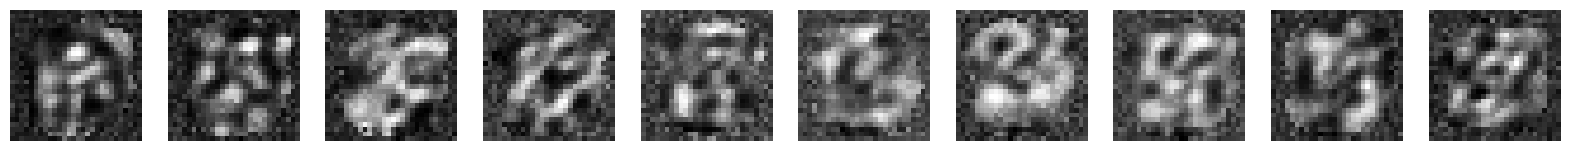

In [ ]:
# Function to generate new digits by sampling random latent vectors
def generate_random_digits(num_digits=10):
    random_latents = np.random.randn(num_digits, latent_dim)  # Random latent vectors
    generated_images = decoder.predict(random_latents)

    # Plot the generated images
    plt.figure(figsize=(20, 4))
    for i, img in enumerate(generated_images):
        plt.subplot(1, num_digits, i + 1)
        plt.imshow(img.reshape(28, 28), cmap='gray')
        plt.axis("off")
    plt.show()

# Generate and display 10 random digits
generate_random_digits(num_digits=10)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Analyzing 10 samples of the digit '1':
Latent vectors shape: (10, 64)
Latent vector values (sample):
[[5.219669   0.         8.28574    8.647947   1.9248469  3.7606874
  5.6150665  3.5930452  6.9054246  0.         5.6031566  4.515743
  6.207391   3.7708092  3.1665933  0.         2.2578864  4.763904
  4.8951902  4.12763    1.6159836  4.8922377  4.665665   2.4472456
  0.63422215 1.2773408  2.5187302  1.1936479  3.0826957  0.
  2.1841905  8.19207    1.7083187  3.452339   4.9195213  4.4106145
  2.137031   5.5889463  4.143479   4.2178946  0.         3.6937194
  3.9224918  1.9667495  3.8196366  1.3857956  3.9609606  0.
  3.9373963  2.2396927  2.5452006  2.1628282  0.45426643 3.2780583
  7.4194717  0.         0.         3.3616338  6.0278845  2.8998353
  3.4705908  0.         5.324068   0.        ]]

Latent space characteristics:
Mean of latent vector: [5.210457  0.        6.060959  8.796686  3.1397853 3.019645  6.2030926
 3.717051  6.174432  0.        5.3

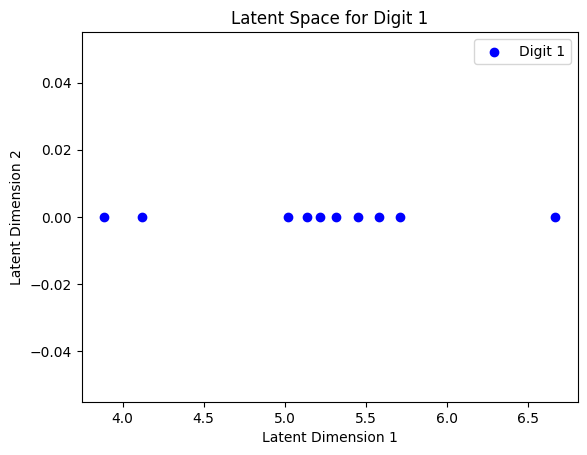

In [ ]:
# Get latent representations for a specific digit (e.g., '1')
latent_1 = evaluate_oneness(x_test, y_test, encoder, digit=1, num_samples=10)

# Visualize latent space of digit '1'
plt.scatter(latent_1[:, 0], latent_1[:, 1], color='blue', label="Digit 1")
plt.title("Latent Space for Digit 1")
plt.xlabel("Latent Dimension 1")
plt.ylabel("Latent Dimension 2")
plt.legend()
plt.show()


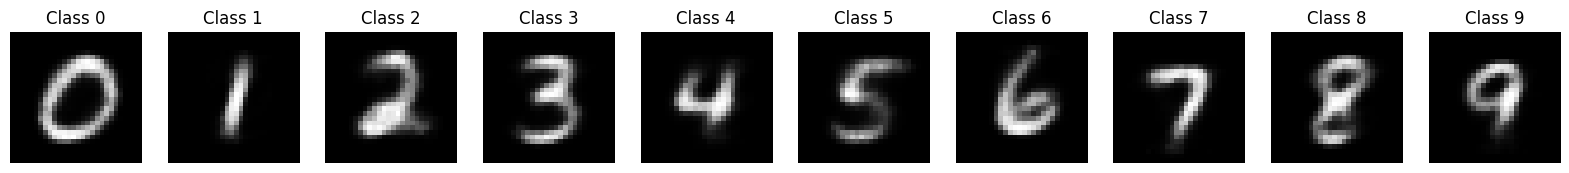

In [ ]:
# Plot class-averaged reconstructions
plt.figure(figsize=(20, 4))
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(reconstructions[i].reshape(28, 28), cmap='gray')
    plt.title(f'Class {i}')
    plt.axis('off')
plt.show()
